In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from Algorithms import AdaBoost, SVM, NonlinearSVM, Logistic, bootstrap, sampling
from utils import cllassification_report, plot_matrix, confusion_matrix, plot_roc_curve
import numpy as np 

titanic_data = pd.read_csv('train.csv')

## Preprocessing


In [2]:
label_encoder = LabelEncoder()

titanic_data.fillna(titanic_data.median(numeric_only=True), inplace=True)

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(
    titanic_data['Embarked'])
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])


X = titanic_data.drop(
    columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

## Scaling Dataset


In [3]:
X_selected = titanic_data[['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']]

In [4]:
X_sampled, y_sampled = sampling(X_selected, y)

In [5]:
scaler = StandardScaler()
scaler.fit(X_sampled)
X_sampled = scaler.transform(X_sampled)
y_sampled = y_sampled.to_numpy()

## Splitting Dataset to Train and Test


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=22)

print(X_selected.shape, X_train.shape, X_test.shape)

(891, 5) (712, 5) (179, 5)


## Linear SVM Model

### Using Bootstraping


In [7]:
svm_model = SVM()

bootstrap_accuracies = bootstrap(X_train, y_train, svm_model, num_bootstrap_samples=5)


print(f"Accuracies: {bootstrap_accuracies}")
print("Mean Accuracy:", bootstrap_accuracies.mean())
print("Standard Deviation:", bootstrap_accuracies.std())

Accuracies: [0.77689243 0.76153846 0.78599222 0.77735849 0.71193416]
Mean Accuracy: 0.7627431513321635
Standard Deviation: 0.026598250233972043


In [8]:
y_test_pred = svm_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.75      0.84      0.79        90
1               0.86      0.78      0.81        89
--------------------------------------------------
Accuracy                                      0.80
Support                                        179



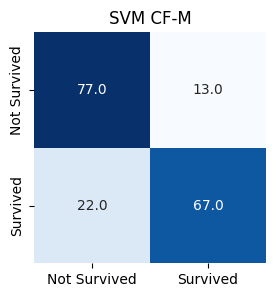

In [9]:
cf = confusion_matrix(y_test, y_test_pred)

plot_matrix(cf, 'SVM')

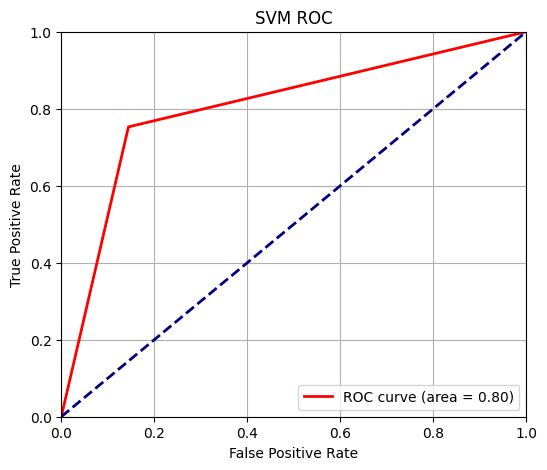

In [10]:
plot_roc_curve(y_test, y_test_pred, 'SVM')

## Non-Linear SVM Model

### Using Bootstraping


In [11]:
non_svm_model = NonlinearSVM()

bootstrap_accuracies = bootstrap(X_train, y_train, non_svm_model, num_bootstrap_samples=5)


print(f"Accuracies: {bootstrap_accuracies}")
print("Mean Accuracy:", bootstrap_accuracies.mean())
print("Standard Deviation:", bootstrap_accuracies.std())

Accuracies: [0.63076923 0.71317829 0.68148148 0.67790262 0.75      ]
Mean Accuracy: 0.6906663257094404
Standard Deviation: 0.03965402661064023


In [12]:
y_test_pred = non_svm_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.66      0.79      0.72        90
1               0.82      0.71      0.76        89
--------------------------------------------------
Accuracy                                      0.74
Support                                        179



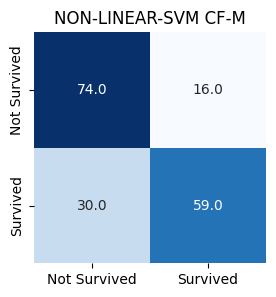

In [13]:
cf = confusion_matrix(y_test, y_test_pred)

plot_matrix(cf, 'NON-LINEAR-SVM')

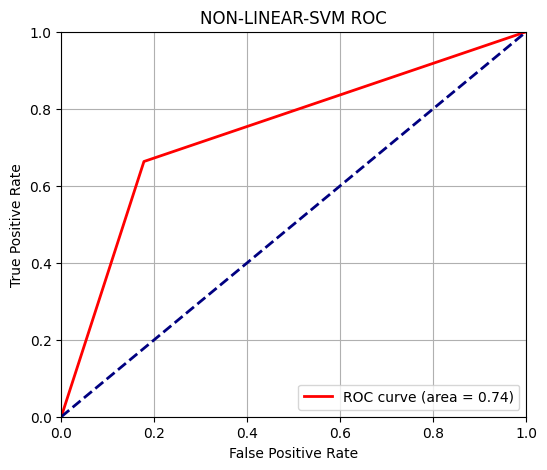

In [14]:
plot_roc_curve(y_test, y_test_pred, 'NON-LINEAR-SVM')

## Logistic Regression Model

### Using Bootstraping


In [15]:
log_model = Logistic()

bootstrap_accuracies = bootstrap(X_train, y_train, log_model, num_bootstrap_samples=5)


print(f"Accuracies: {bootstrap_accuracies}")
print("Mean Accuracy:", bootstrap_accuracies.mean())
print("Standard Deviation:", bootstrap_accuracies.std())

Accuracies: [0.76865672 0.7032967  0.74524715 0.7752809  0.76245211]
Mean Accuracy: 0.7509867148319371
Standard Deviation: 0.02585022778525427


In [16]:
y_test_pred = log_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.78      0.79      0.78        90
1               0.80      0.78      0.79        89
--------------------------------------------------
Accuracy                                      0.79
Support                                        179



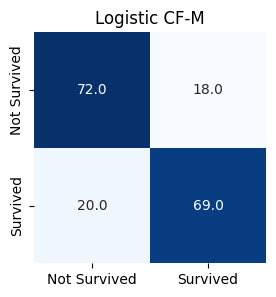

In [17]:
cf = confusion_matrix(y_test, y_test_pred)
plot_matrix(cf, 'Logistic')

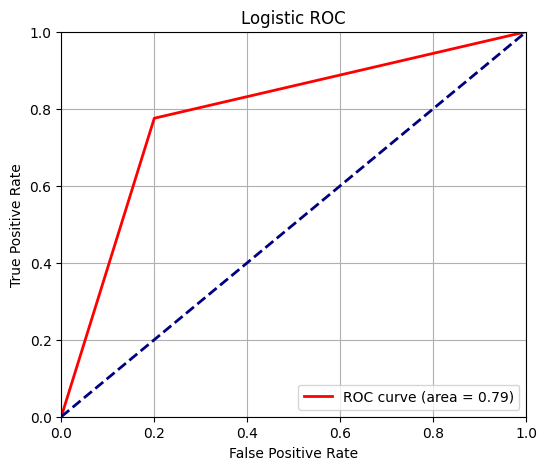

In [18]:
plot_roc_curve(y_test, y_test_pred, 'Logistic')

## AdaBoost Model

### Using Bootstraping


In [19]:
ada_model = AdaBoost()

bootstrap_accuracies = bootstrap(X_train, y_train, ada_model, num_bootstrap_samples=5)

print(f"Accuracies: {bootstrap_accuracies}")
print("Mean Accuracy:", bootstrap_accuracies.mean())
print("Standard Deviation:", bootstrap_accuracies.std())

Accuracies: [0.77689243 0.72075472 0.78378378 0.74904943 0.70289855]
Mean Accuracy: 0.7466757822852464
Standard Deviation: 0.031253900309073115


In [20]:
y_test_pred = ada_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.75      0.84      0.79        90
1               0.86      0.78      0.81        89
--------------------------------------------------
Accuracy                                      0.80
Support                                        179



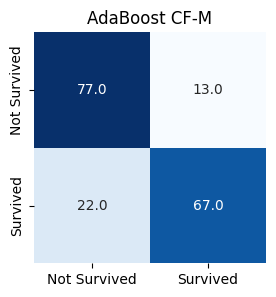

In [21]:
cf = confusion_matrix(y_test, y_test_pred)
plot_matrix(cf, 'AdaBoost')

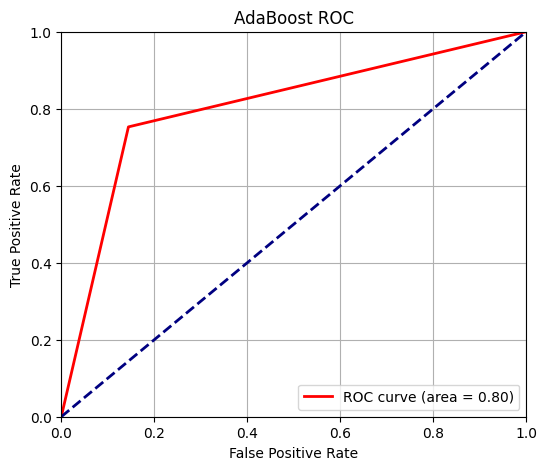

In [22]:
plot_roc_curve(y_test, y_test_pred, 'AdaBoost')